<a href="https://colab.research.google.com/github/R329aghav/Raghavjr/blob/main/Breast_cancer_classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("hi,raghav this side")

In [ ]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
path="/content/drive/MyDrive/DATASETS/data.csv"

In [ ]:
data=pd.read_csv(path)
data

In [ ]:
data.head(10)

In [ ]:
del data['Unnamed: 32']

In [ ]:
data.head()

In [ ]:
data.ndim

In [ ]:
data.shape

In [ ]:
data.size

In [ ]:
import seaborn as sns
visulize=sns.countplot(data['diagnosis'],label='count')
B,M=data['diagnosis'].value_counts()
print("Benign",B)
print("Malingnant",M)

In [ ]:
#split data for training and testing
X=data.iloc[:,2:].values
y=data.iloc[:,1].values

In [ ]:
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [ ]:
X.head()

In [ ]:
X.shape,X.size,y.shape,y.size

In [ ]:
# visulize data in X and Y
X=data.iloc[:,2:].values
y=data.iloc[:,1].values

# plt.figure(figsize=(10,7))
# #lets visulize the data
# plt.scatter(X,y,label="dataset")
# plt.show()


#encoding for categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1=LabelEncoder()
y=labelencoder_X_1.fit_transform(y)



#spliting the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)



#feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
! pip install keras

In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU

##create Sequential
classifier=Sequential()

##1. create input layer

classifier.add(Dense(16,kernel_initializer="uniform",activation="relu",input_dim=30))

##2.create hidden layer

classifier.add(Dense(16,kernel_initializer="uniform",activation="relu"))

##3.create output layer

classifier.add(Dense(1,kernel_initializer="uniform",activation="sigmoid"))

##4.compile our model
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=["accuracy"])

##5.fit our model
classifier.fit(X_train,y_train,validation_split=0.33,batch_size=100,epochs=500,verbose=0)

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
#making a confusion matrix
from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[38,  2],
       [ 6, 11]])

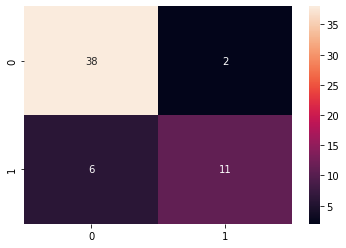

In [ ]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [ ]:
import math
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(mse)

0.14035087719298245


In [ ]:
import math
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.14035087719298245


In [ ]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

0.14035087719298245


In [ ]:
rmse=np.sqrt(mse)
print(rmse)

0.3746343246326776


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  classifier=Sequential()
  classifier.add(Dense(16,kernel_initializer="uniform",activation="relu",input_dim=30))
  classifier.add(Dense(16,kernel_initializer="uniform",activation="relu"))
  classifier.add(Dense(1,kernel_initializer="uniform",activation="sigmoid"))
  classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=["accuracy"])
  return classifier
 
classifier = KerasClassifier(build_fn=built_classifier,batch_size=100,epochs=100)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,n_jobs=-1)



In [ ]:
accuracies,accuracies.mean(),accuracies.std()

(array([0.94230771, 0.94230771, 0.98039216, 0.86274511, 0.88235295,
        0.96078432, 0.94117647, 0.86274511, 0.86274511, 0.88235295]),
 0.9119909584522248,
 0.043337981370118246)

In [ ]:
##hyperparameter tuning using grid search

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer='adam'):
  classifier=Sequential()
  classifier.add(Dense(16,kernel_initializer="uniform",activation="relu",input_dim=30))
  classifier.add(Dense(16,kernel_initializer="uniform",activation="relu"))
  classifier.add(Dense(1,kernel_initializer="uniform",activation="sigmoid"))
  classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=["accuracy"])
  return classifier

classifier=KerasClassifier(build_fn=built_classifier)
parameters={'batch_size':[100,150],'epochs':[100,200],'optimizer':['Adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10)
grid_search=grid_search.fit(X_train,y_train)
best_parameters=grid_search.best_params_
best_accuracy=grid_search.best_score_

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 7ms/step - loss: 0.1980 - accuracy: 0.9132
Epoch 102/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2019 - accuracy: 0.9154
Epoch 103/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1985 - accuracy: 0.9176
Epoch 104/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2120 - accuracy: 0.9176
Epoch 105/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2009 - accuracy: 0.9176
Epoch 106/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 0.9111
Epoch 107/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1989 - accuracy: 0.9154
Epoch 108/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2193 - accuracy: 0.9197
Epoch 109/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2118 - accuracy: 0.9154
Epoch 110/200
4/4 [==============================] - 0s 6ms/step - loss:

In [ ]:
best_parameters

{'batch_size': 100, 'epochs': 200, 'optimizer': 'Adam'}

In [ ]:
best_accuracy

0.9335218702865762